기초적인 통계량 그래프 그려보기

1-1 데이터 불러오기

In [31]:
# pandas 모듈을 pd로 읽어오기
import pandas as pd
# hat 변수 데이터셋 입력
hat = pd.read_csv("ch4-1.csv")


In [32]:
# 위에서부터 5개 데이터 확인
hat.head()
# hat.head(숫자) 숫자 만큼의 행 출력

,hatchery,chick
0,A,30
1,B,30
2,C,29
3,D,26
4,E,24


In [33]:
# 뒤에서부터 3개의 데이터 확인
hat.tail(3)

,hatchery,chick
4,E,24
5,F,28
6,G,27


기초 통계량 구하기

In [34]:
hat.chick.sum()

194

In [35]:
hat['chick'].sum()

194

평균, 표준편차

In [36]:
hat['chick'].mean() # 평균 구하기

27.714285714285715

In [37]:
hat['chick'].std() # 표준 편차

2.2146697055682827

In [38]:
# 중앙값, 평균과는 다름
# 중앙값을 데이터를 크기 순서대로 배열했을때 중앙 위치 중앙에 위치한거라 평균과 다름 12 77 99 100 이러면 77이 중앙이니
hat['chick'].median()

28.0

In [10]:
hat['chick'].min() # 최소값

24

In [11]:
hat['chick'].max() # 최대값

30

In [39]:
# 오름차순 정렬, false면 내림차순
hat.sort_values(by='chick',ascending=True)

,hatchery,chick
4,E,24
3,D,26
6,G,27
5,F,28
2,C,29
0,A,30
1,B,30


막대 그래프 그려보기

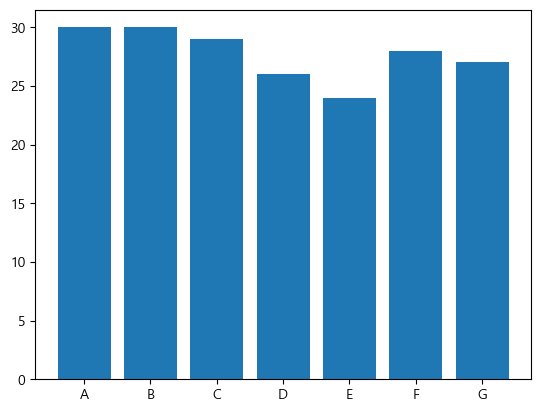

In [40]:
# matplotlib.pyplot 불러오기
import matplotlib.pyplot as plt
# 막대 그래프 그리기
plt.bar(hat['hatchery'],hat['chick'])
plt.show()

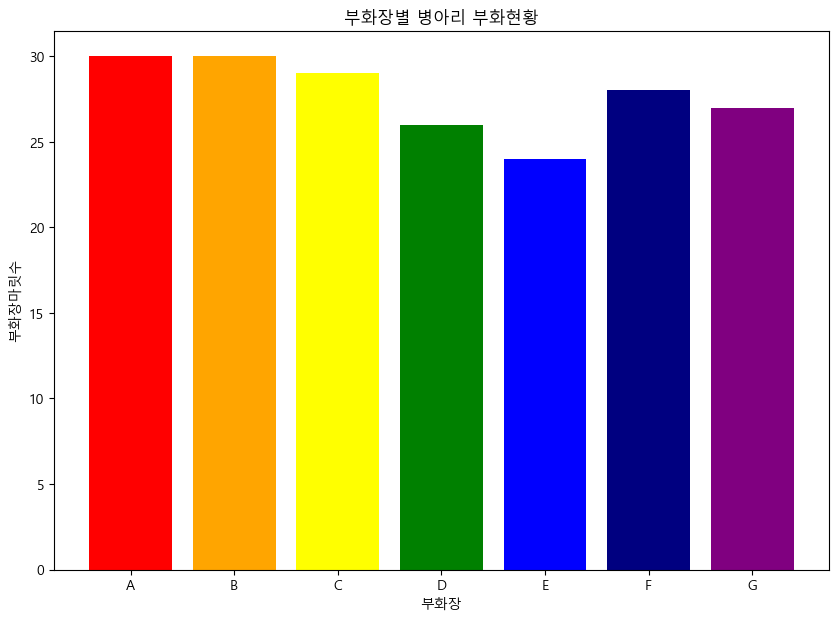

In [41]:
# 막대 그래프 그리기, 다양한 파라메터 추가
plt.figure(figsize=(10,7))
plt.bar(hat['hatchery'], hat['chick'], color=['red', 'orange', 'yellow', 'green', 'blue', 'navy', 'purple'])
plt.title('부화장별 병아리 부화현황')
plt.xlabel('부화장')
plt.ylabel('부화장마릿수')
plt.show()

한글 폰트 지정 및 그래프 색상 바꿔보기

In [18]:
# 그래프 한글 깨짐 문제 해결을 위해서 맑은 고딕 폰트 지정
from matplotlib import font_manager, rc
font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family = font_name)

seaborn 패키지로 팔레트

<Figure size 1000x700 with 0 Axes>

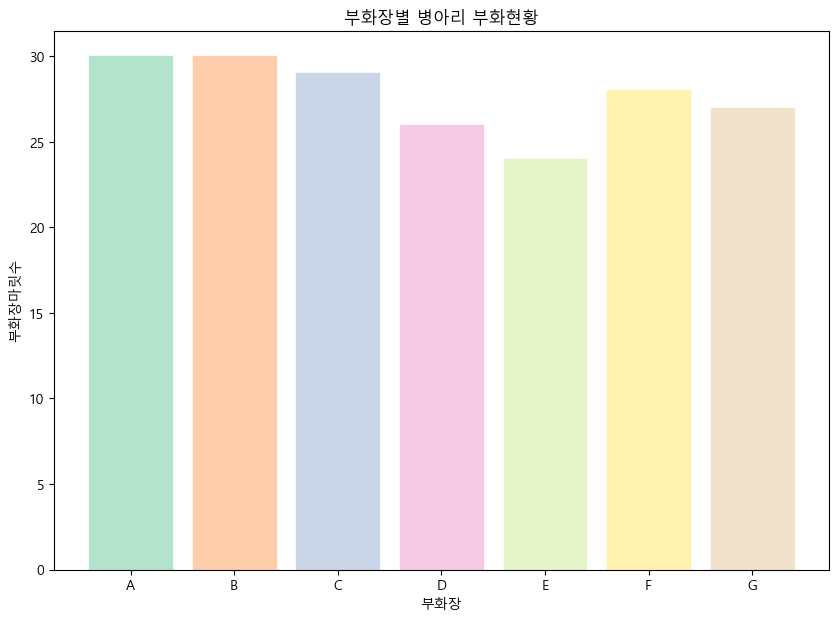

In [42]:
import seaborn as sns # seaborn 패키지
col7 = sns.color_palette('Pastel2',7)
plt.figure(figsize=(10,7))
plt.figure(figsize=(10,7))
plt.bar(hat['hatchery'], hat['chick'], color=col7,edgecolor=col7)
plt.title('부화장별 병아리 부화현황')
plt.xlabel('부화장')
plt.ylabel('부화장마릿수')
plt.show()


그래프 위에 텍스트 추가하기
pyplot에서 text() 함수를 이용하고
예) text(x좌표, y좌표, 표시할 텍스트)

In [49]:
# 텍스트 추가 사용자 정의함수 만들기
def addtext(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+0.5,y[i], ha='center')
       

<Figure size 1000x700 with 0 Axes>

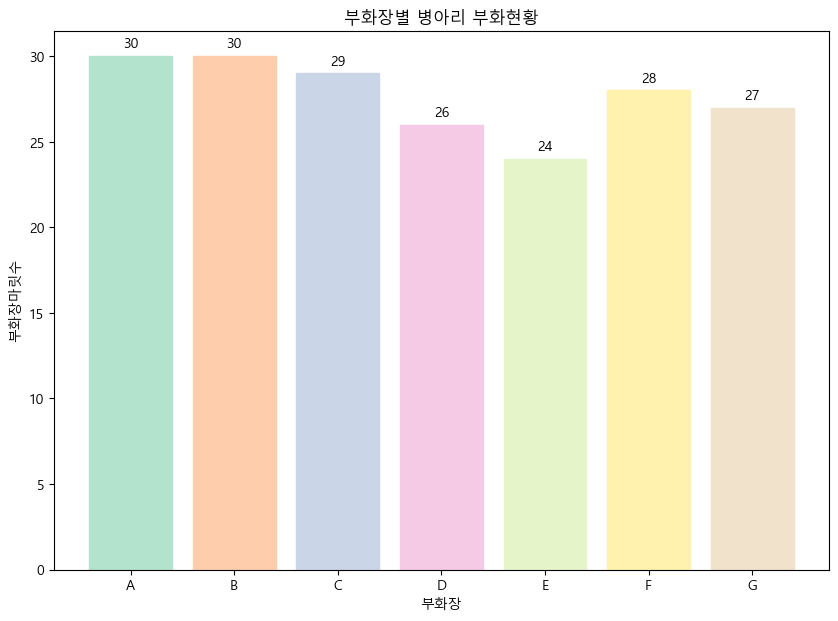

In [50]:
import seaborn as sns # seaborn 패키지
col7 = sns.color_palette('Pastel2',7)
plt.figure(figsize=(10,7))
plt.figure(figsize=(10,7))
plt.bar(hat['hatchery'], hat['chick'], color=col7,edgecolor=col7)

# 텍스트 표시 사용자 정의함수 추가
addtext(hat['hatchery'], hat['chick'])

plt.title('부화장별 병아리 부화현황')
plt.xlabel('부화장')
plt.ylabel('부화장마릿수')
plt.show()

그래프 위에 선 추가하기

부화장별 최대 30마리 병화리 부화 
y축을 기준으로 30에 빨간 점선을 한번 그어보겠습니다

hlines() 함수
hlines(y좌표 x좌표 최소값 최대값)
색상과 선 종류를 각각 colors linestyles 사용

vlines는 수직선

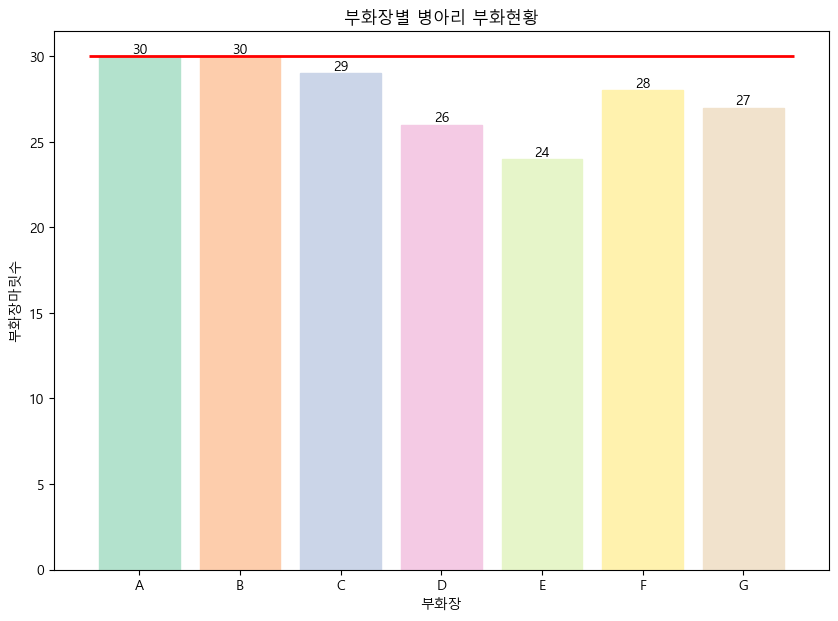

In [46]:
import seaborn as sns # seaborn 패키지
col7 = sns.color_palette('Pastel2', 7)

plt.figure(figsize=(10, 7))
plt.bar(hat['hatchery'], hat['chick'], color=col7, edgecolor=col7)

# 텍스트 표시 사용자 정의함수 추가
def addtext(x, y):
    for i, v in enumerate(y):
        plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

addtext(hat['hatchery'], hat['chick'])

# 빨간선 그리는 부분
plt.hlines(30, -0.5, 6.5, colors='red', linewidth=2)

plt.title('부화장별 병아리 부화현황')
plt.xlabel('부화장')
plt.ylabel('부화장마릿수')
plt.show()

파이 차트 그려보기

파이 차트 - 항목별 비율을 확인

예) 부화장별 병아리 부화 비율 나타냄

In [47]:
# 파이 차트를 그리기 위해 비율 계산
pct = hat['chick']/hat['chick'].sum()
pct

0    0.154639
1    0.154639
2    0.149485
3    0.134021
4    0.123711
5    0.144330
6    0.139175
Name: chick, dtype: float64

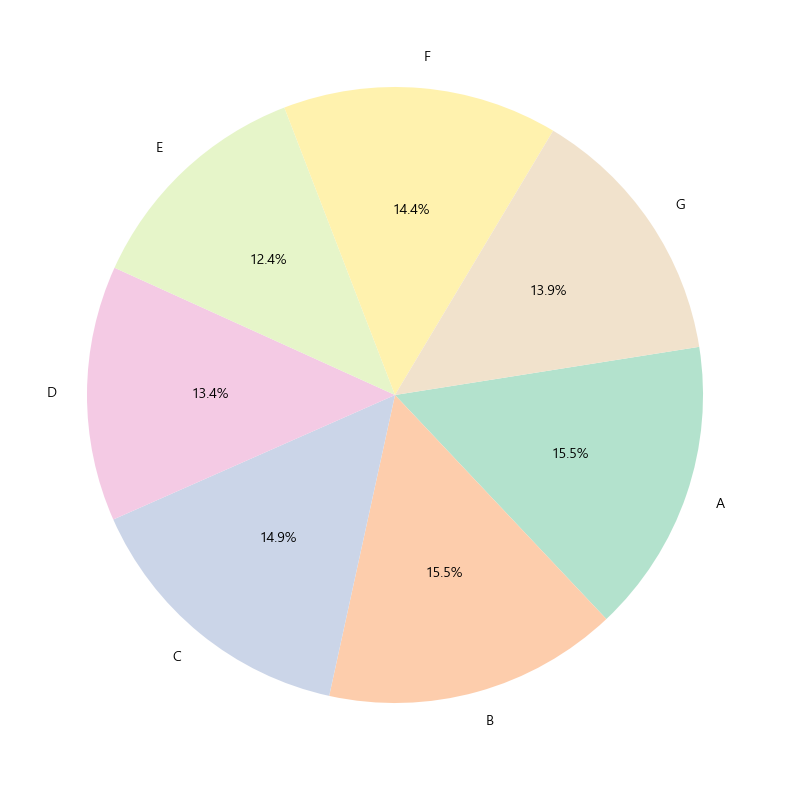

In [48]:
# 파이 차트 그리기
col7 = sns.color_palette('Pastel2',7)
plt.figure(figsize=(10,10))
plt.pie(pct, labels=hat['hatchery'], autopct='%.1f%%', colors=col7, startangle=9, counterclock=False)
plt.show()